# t-Student distribution (df=5)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.stats.diagnostic import lilliefors
import seaborn as sns
import matplotlib as mpl

import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/val-metodos-analiticos/funcs')
import functions_paper as functions

In [2]:
n_samples = 10000
# n_samples = 500

seeds = np.arange(1,n_samples+1)
rng = np.random.default_rng(42)
rng.shuffle(seeds)


In [3]:
n_rep = (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30)

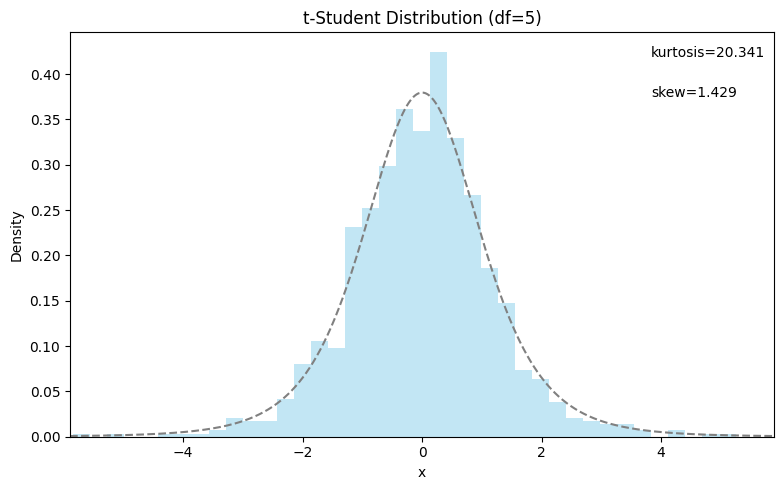

In [4]:
df = 5

fig, ax = plt.subplots(figsize=(8,5))

x = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(0.999, df=df), 1000)
ax.plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_student_data = stats.t.rvs(size=x.size, df=df, random_state=42, )
ax.hist(t_student_data, density=True,  bins='auto', histtype='stepfilled',  alpha=0.5, color="skyblue")
ax.text(0.825, 0.95, f"kurtosis={round(stats.kurtosis(t_student_data)+3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.text(0.825, 0.85, f"skew={round(stats.skew(t_student_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.set_title(f"t-Student Distribution (df={df})")
ax.set_xlim([x[0], x[-1]])
fig.tight_layout()
plt.show()



In [5]:
abdi_result = []
ad_result = []
filli_result = []
ks_result = []
li_result = []
shapiro_result = []

n_rep_result = []
alpha_result = []
seed_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    t_data = stats.t.rvs(df=df, loc=0, scale=1, size=max(n_rep), random_state=seed)
    
    for n in n_rep:
        
        abdi_result.append(functions.abdi_molin(t_data[:n]))
        ad_result.append(functions.anderson_darling(t_data[:n]))
        filli_result.append(functions.filliben(t_data[:n]))
        ks_result.append(functions.ks_test(t_data[:n]))
        li_result.append(functions.lilliefors_test(t_data[:n]))
        shapiro_result.append(functions.shapiro_wilk_test(t_data[:n]))
        
        seed_result.append([seed]*3)
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = functions.flatten(shapiro_result)
ks_result = functions.flatten(ks_result)
li_result = functions.flatten(li_result)
ad_result = functions.flatten(ad_result)
abdi_result = functions.flatten(abdi_result)
filli_result = functions.flatten(filli_result)
seed_result = functions.flatten(seed_result)
n_rep_result = functions.flatten(n_rep_result)
alpha_result = functions.flatten(alpha_result)        

df_data = pd.DataFrame({
    "Abdi-Molin": abdi_result,
    "Anderson-Darling": ad_result,    
    "Filliben": filli_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Shapiro-Wilk": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})


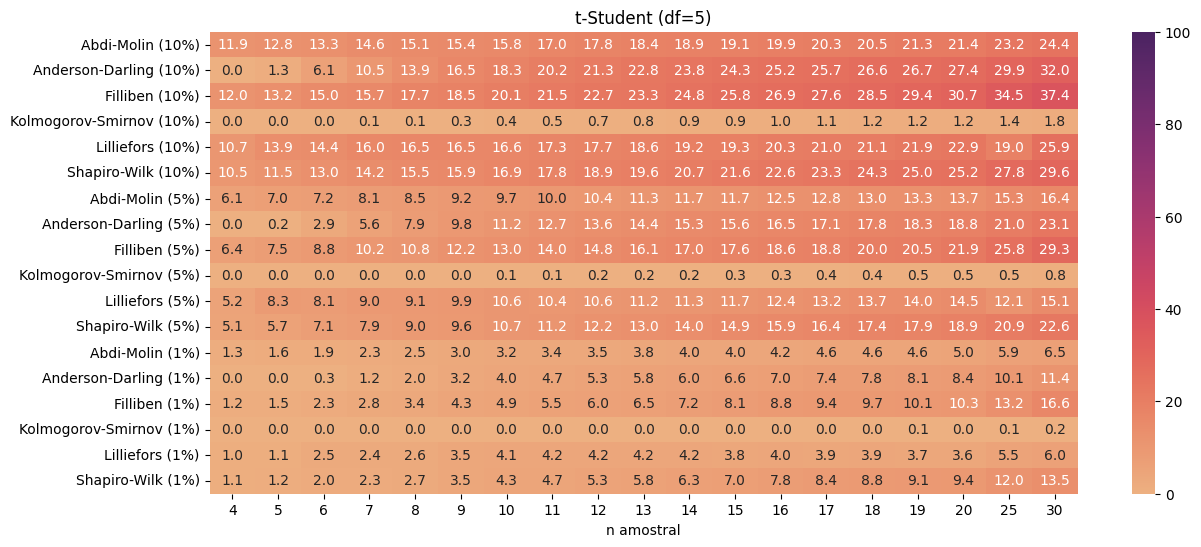

In [6]:
functions.make_heatmap(df_data, f"t-Student (df={df})", n_samples, normal=False)

In [7]:
df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})


df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})


df_filli = pd.DataFrame({
    "Resultado": filli_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})


df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})


df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result,
})




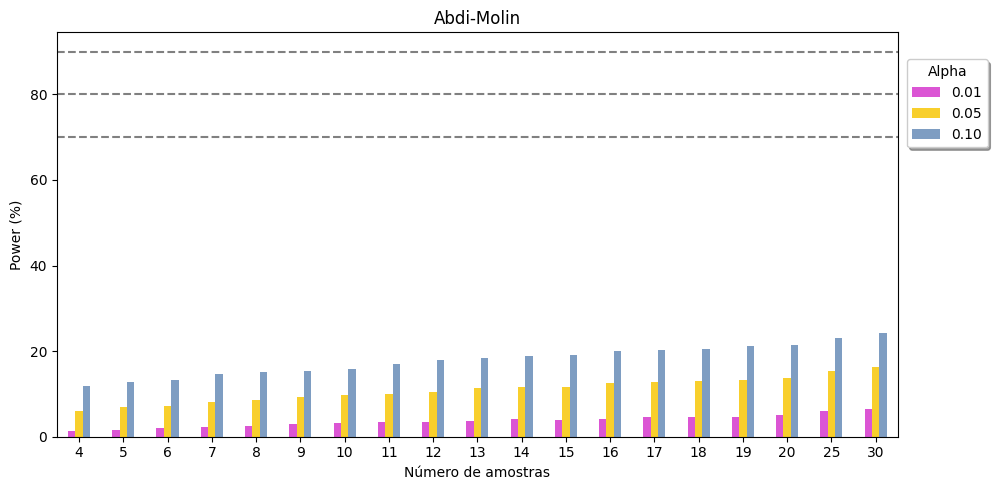

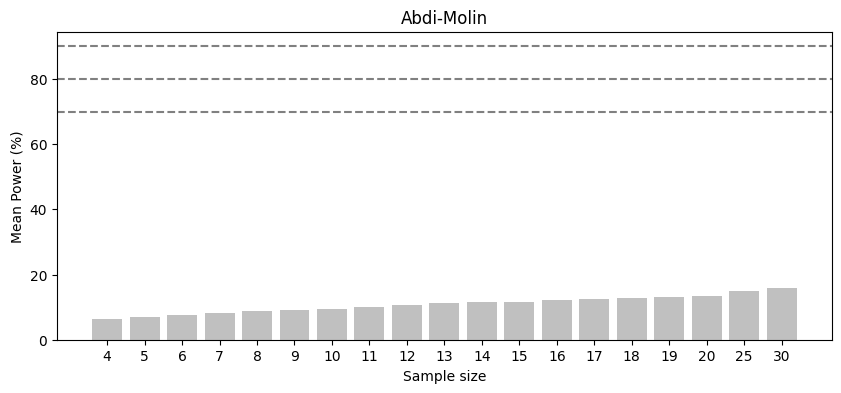

In [8]:
functions.make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=False)
functions.make_bar_plot_average_alpha(df_abdi, n_samples, "Abdi-Molin", kind=False)

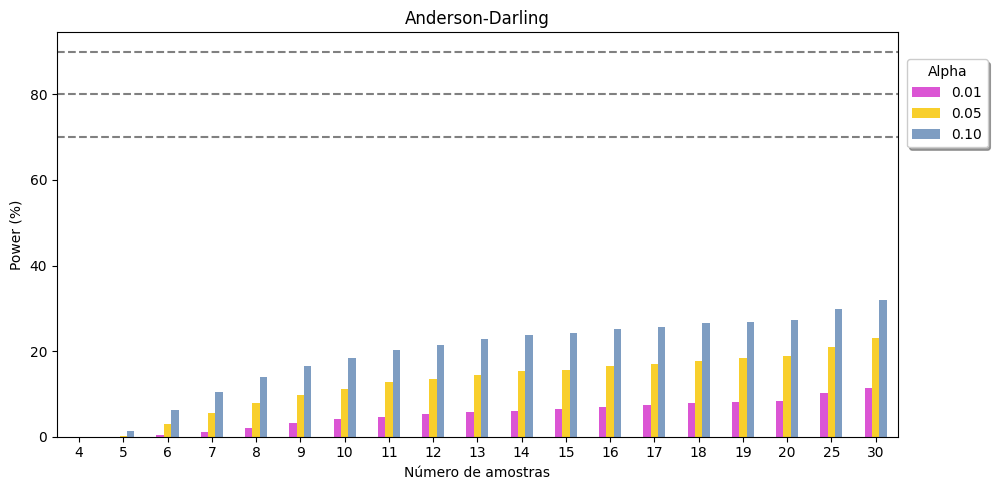

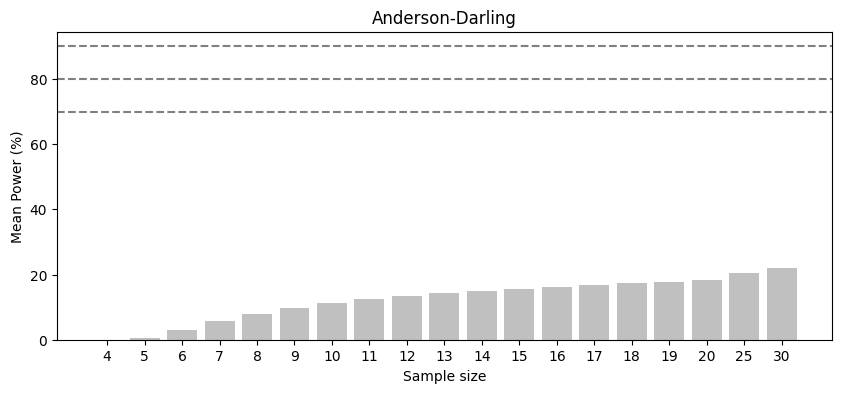

In [9]:
functions.make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=False)
functions.make_bar_plot_average_alpha(df_ad, n_samples, "Anderson-Darling", kind=False)

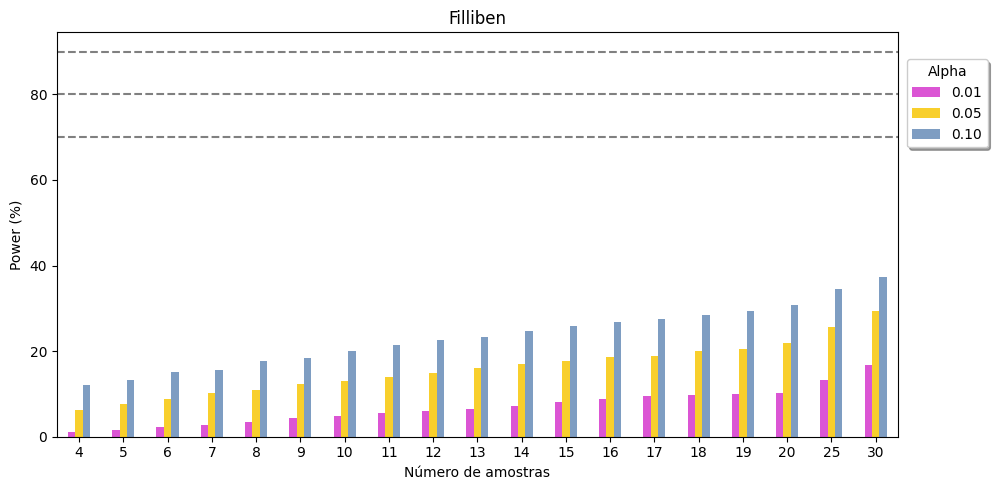

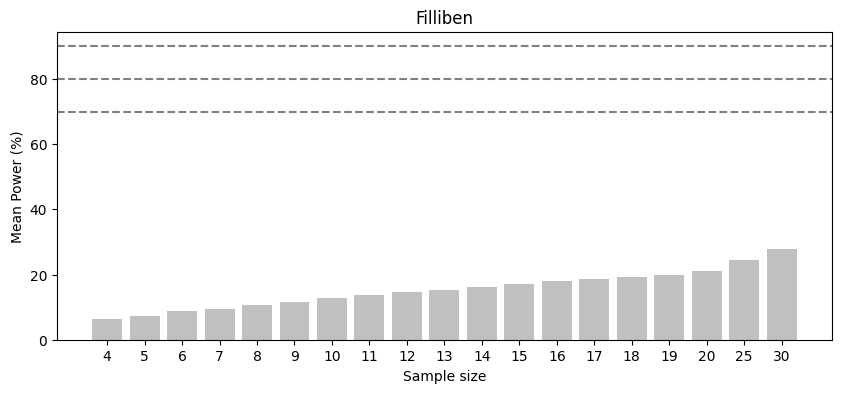

In [10]:
functions.make_bar_plot(df_filli, n_samples, "Filliben", kind=False)
functions.make_bar_plot_average_alpha(df_filli, n_samples, "Filliben", kind=False)

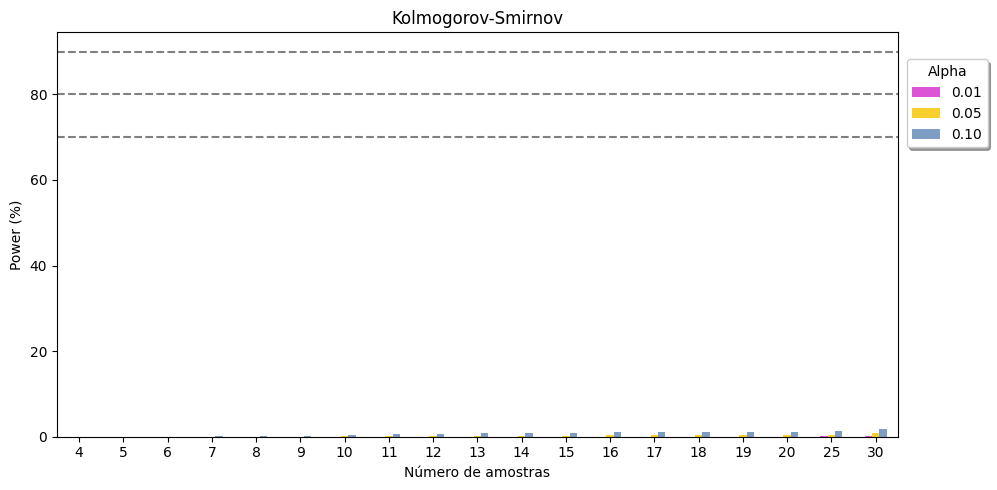

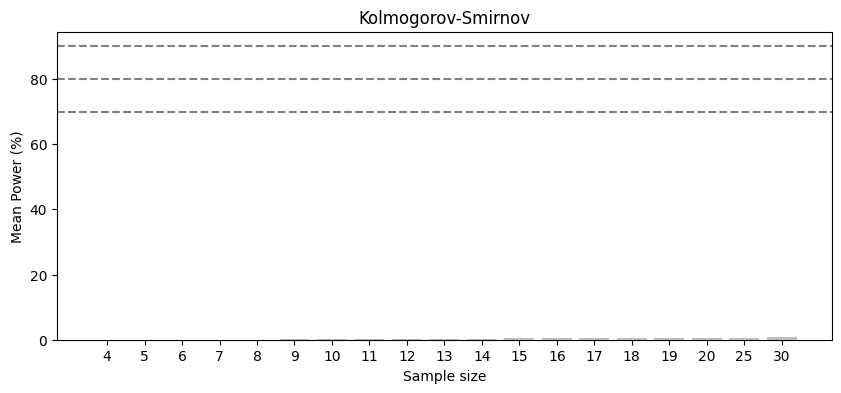

In [11]:
functions.make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=False)
functions.make_bar_plot_average_alpha(df_ks, n_samples, "Kolmogorov-Smirnov", kind=False)

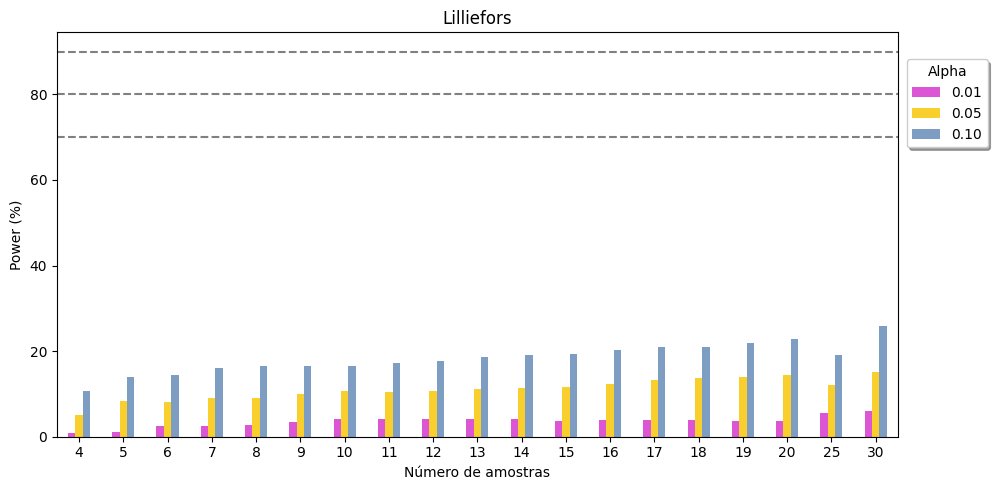

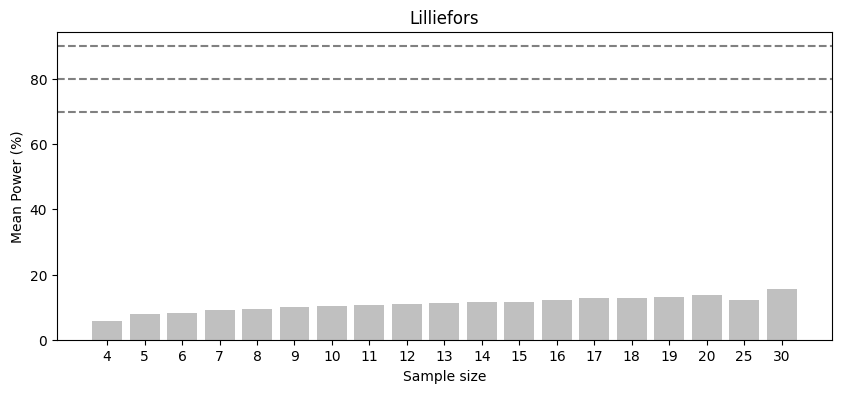

In [12]:
functions.make_bar_plot(df_li, n_samples, "Lilliefors", kind=False)
functions.make_bar_plot_average_alpha(df_li, n_samples, "Lilliefors", kind=False)

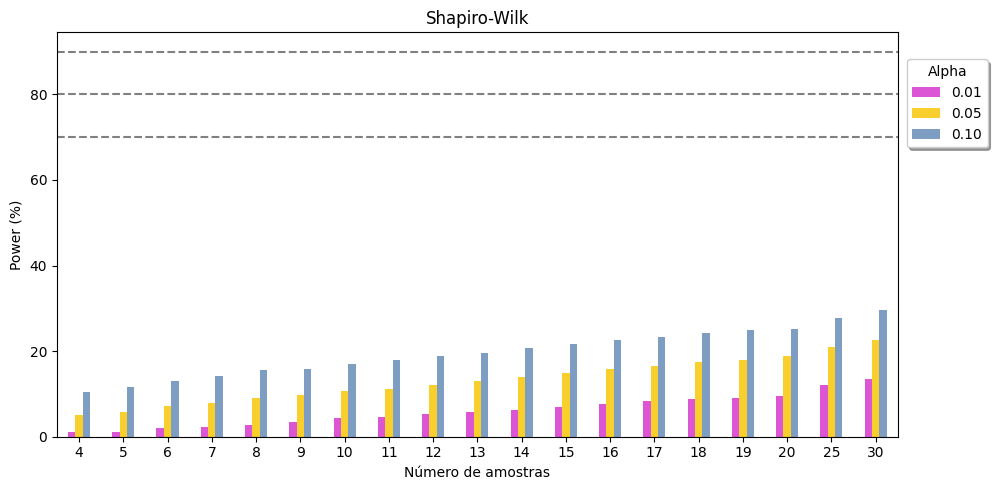

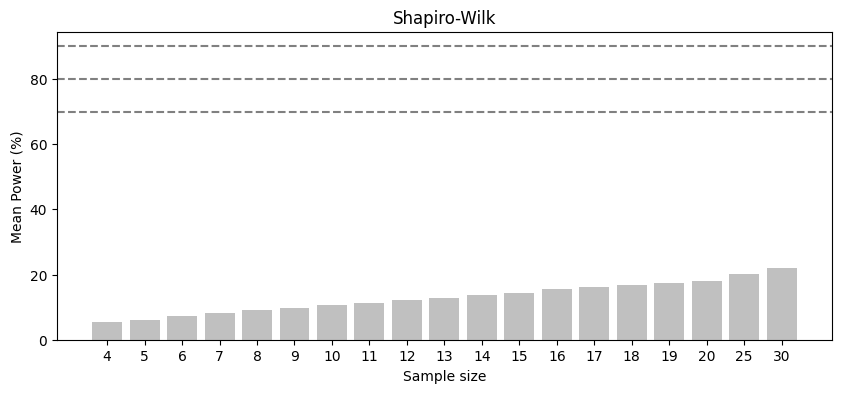

In [13]:
functions.make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=False)
functions.make_bar_plot_average_alpha(df_shapiro, n_samples, "Shapiro-Wilk", kind=False)

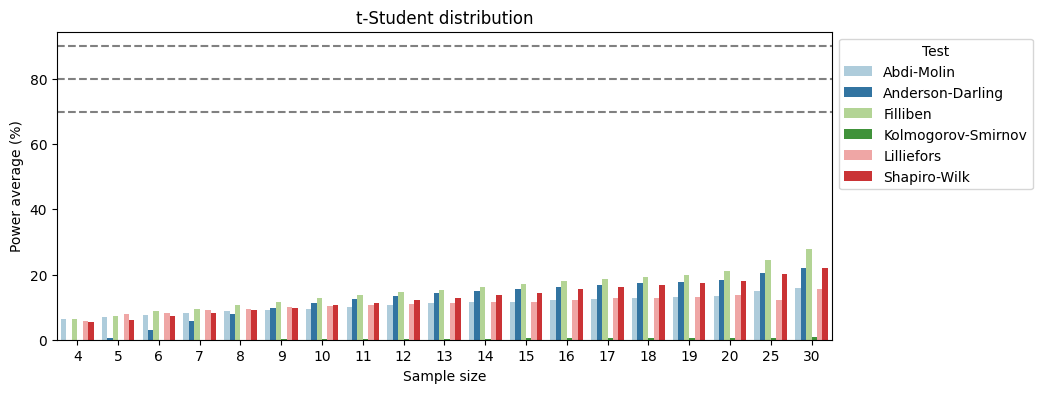

In [14]:
functions.make_global_average_bar_plot(
    [df_abdi, df_ad, df_filli, df_ks, df_li, df_shapiro], 
    ["Abdi-Molin", "Anderson-Darling", "Filliben", "Kolmogorov-Smirnov",  "Lilliefors", "Shapiro-Wilk"], 
    n_samples, f"t-Student distribution", kind=False)

In [15]:
df_normal = functions.make_calc(df_data, False)
df_normal["Distribution"] = f"t-Student (df={df})"

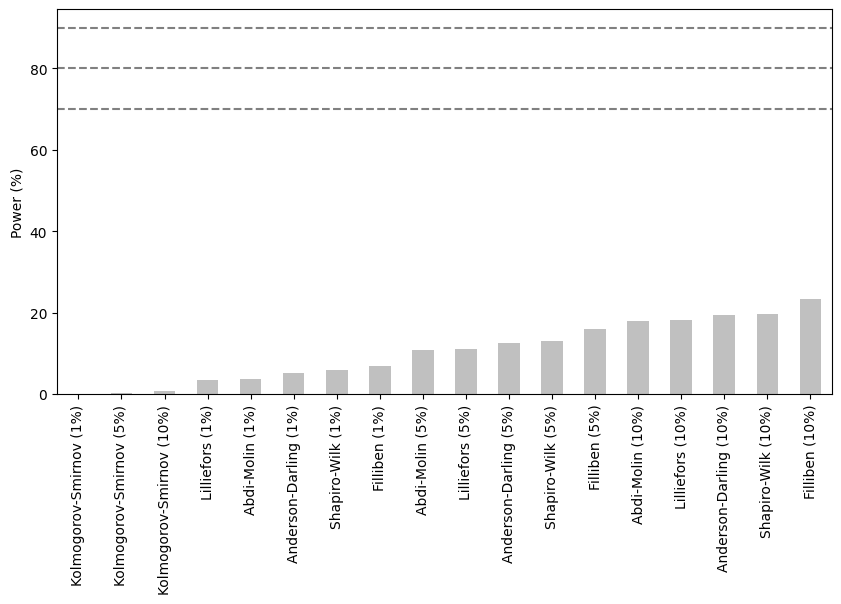

In [16]:
functions.plot_all_results_percentage(df_normal, n_samples, False)

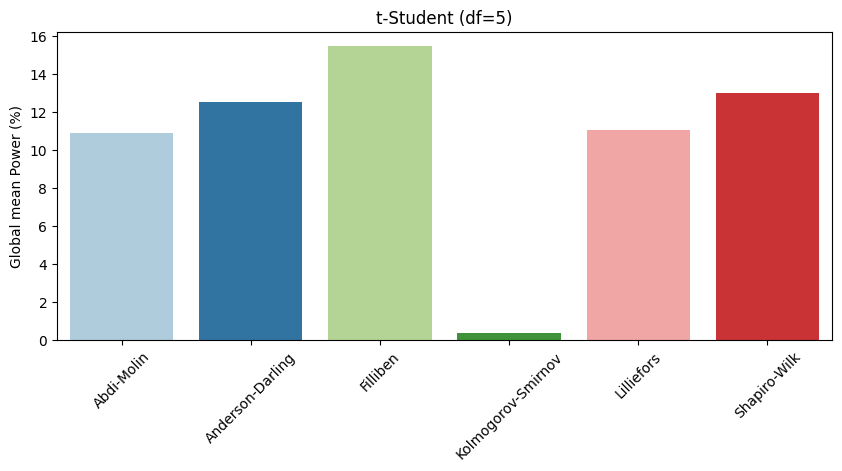

In [17]:
functions.make_plot_average_alpha_size(
    [df_abdi, df_ad, df_filli, df_ks, df_li, df_shapiro], 
    ["Abdi-Molin", "Anderson-Darling", "Filliben", "Kolmogorov-Smirnov",  "Lilliefors", "Shapiro-Wilk"],
    n_samples, f"t-Student (df={df})", kind=False)

In [18]:
functions.ranking(
    [df_abdi, df_ad, df_filli, df_ks, df_li, df_shapiro], 
    ["Abdi-Molin", "Anderson-Darling", "Filliben", "Kolmogorov-Smirnov",  "Lilliefors", "Shapiro-Wilk"],
    n_samples, kind=False)

,Full Mean,Test,rank
0,10.854561,Abdi-Molin,5.0
1,12.522456,Anderson-Darling,3.0
2,15.440000,Filliben,1.0
3,0.325439,Kolmogorov-Smirnov,6.0
4,11.010175,Lilliefors,4.0
5,12.978947,Shapiro-Wilk,2.0


#### Visualização

A jornada inicia com uma verificação das redondezas pelos nossos heróis. 



In [19]:
rng = np.random.default_rng(42)
seed_to_visualize_data = rng.choice(seeds, size=6, replace=False)

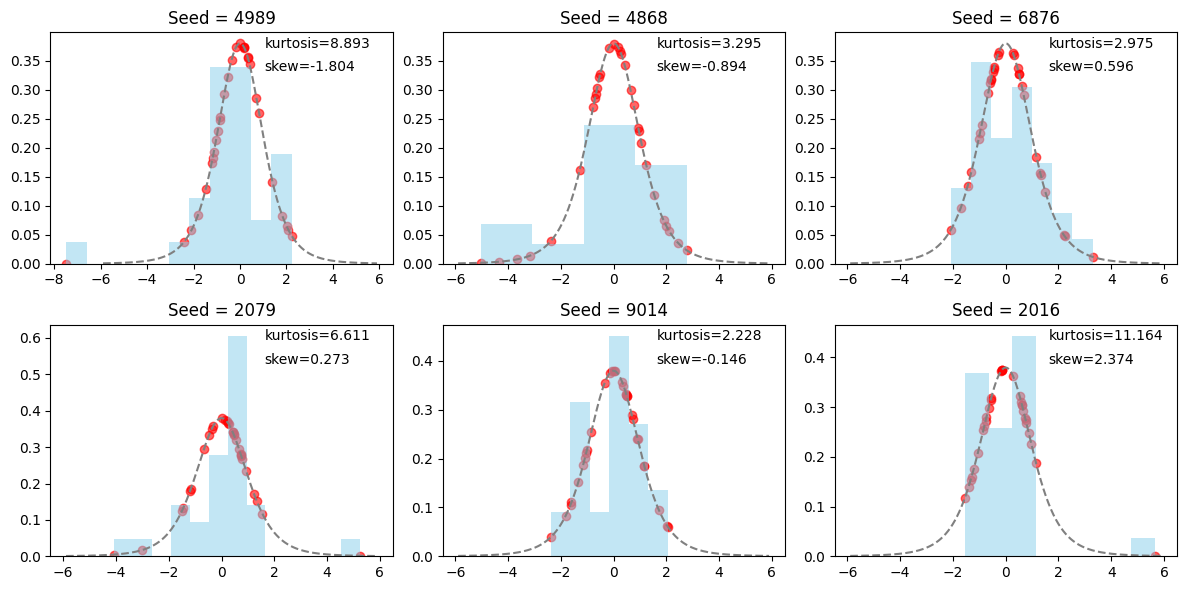

In [20]:
x = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(0.999, df=df), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,0].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].hist(t_data, density=True, alpha=0.5, color="skyblue", bins='auto', histtype='stepfilled',)
ax[0,0].text(0.625, 0.95, f"kurtosis={round(stats.kurtosis(t_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,0].text(0.625, 0.85, f"skew={round(stats.skew(t_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,1].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].hist(t_data, density=True, alpha=0.5, color="skyblue", bins='auto', histtype='stepfilled',)
ax[0,1].text(0.625, 0.95, f"kurtosis={round(stats.kurtosis(t_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,1].transAxes)
ax[0,1].text(0.625, 0.85, f"skew={round(stats.skew(t_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,1].transAxes)
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 2
ax[0,2].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,2].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].hist(t_data, density=True, alpha=0.5, color="skyblue", bins='auto', histtype='stepfilled',)
ax[0,2].text(0.625, 0.95, f"kurtosis={round(stats.kurtosis(t_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,2].transAxes)
ax[0,2].text(0.625, 0.85, f"skew={round(stats.skew(t_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,2].transAxes)
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")



i = 3
ax[1,0].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,0].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].hist(t_data, density=True, alpha=0.5, color="skyblue", bins='auto', histtype='stepfilled',)
ax[1,0].text(0.625, 0.95, f"kurtosis={round(stats.kurtosis(t_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,0].text(0.625, 0.85, f"skew={round(stats.skew(t_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,1].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].hist(t_data, density=True, alpha=0.5, color="skyblue", bins='auto', histtype='stepfilled',)
ax[1,1].text(0.625, 0.95, f"kurtosis={round(stats.kurtosis(t_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,1].transAxes)
ax[1,1].text(0.625, 0.85, f"skew={round(stats.skew(t_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,1].transAxes)
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,2].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].hist(t_data, density=True, alpha=0.5, color="skyblue", bins='auto', histtype='stepfilled',)
ax[1,2].text(0.625, 0.95, f"kurtosis={round(stats.kurtosis(t_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,2].transAxes)
ax[1,2].text(0.625, 0.85, f"skew={round(stats.skew(t_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,2].transAxes)
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

In [21]:
data_kurtosis = []
data_skew = []
mean = []
std = []


for seed in seeds:
    t_data = stats.t.rvs(size=max(n_rep), df=df)
    data_kurtosis.append(stats.kurtosis(t_data)+3)
    data_skew.append(stats.skew(t_data))
    mean.append(np.mean(t_data))
    std.append(np.std(t_data, ddof=1))


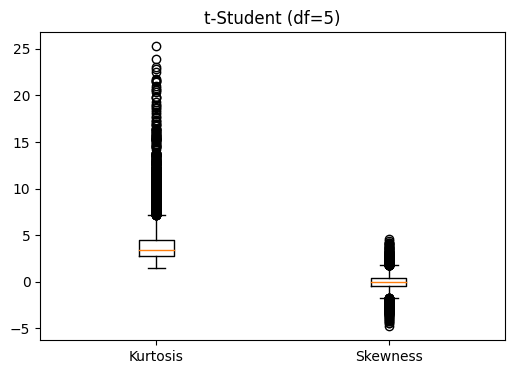

In [22]:
plt.figure(figsize=(6,4))
plt.boxplot([data_kurtosis, data_skew], labels=["Kurtosis", "Skewness"])
plt.title(f"t-Student (df={df})")
plt.show()

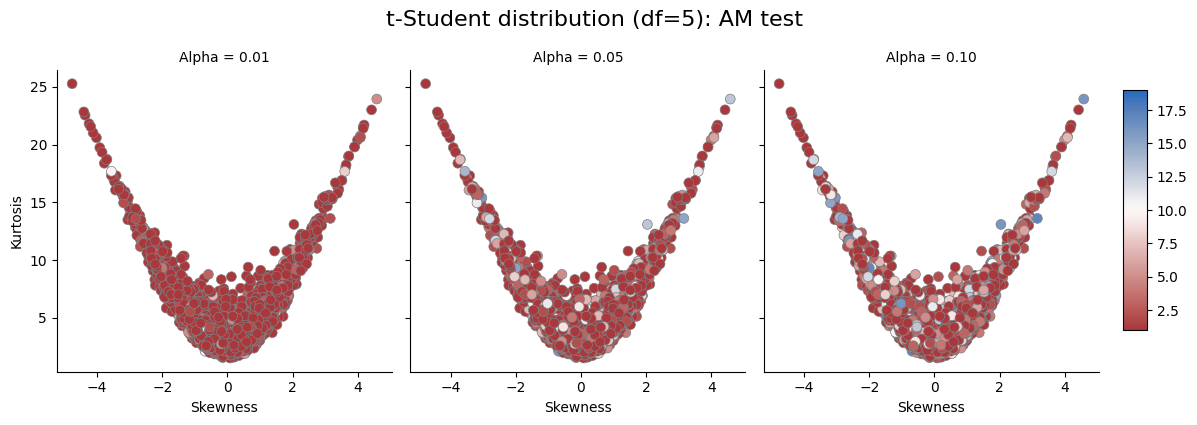

In [23]:
df_abdi["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_abdi, seeds, data_kurtosis, data_skew, f"t-Student distribution (df={df}): AM test", kind=False)

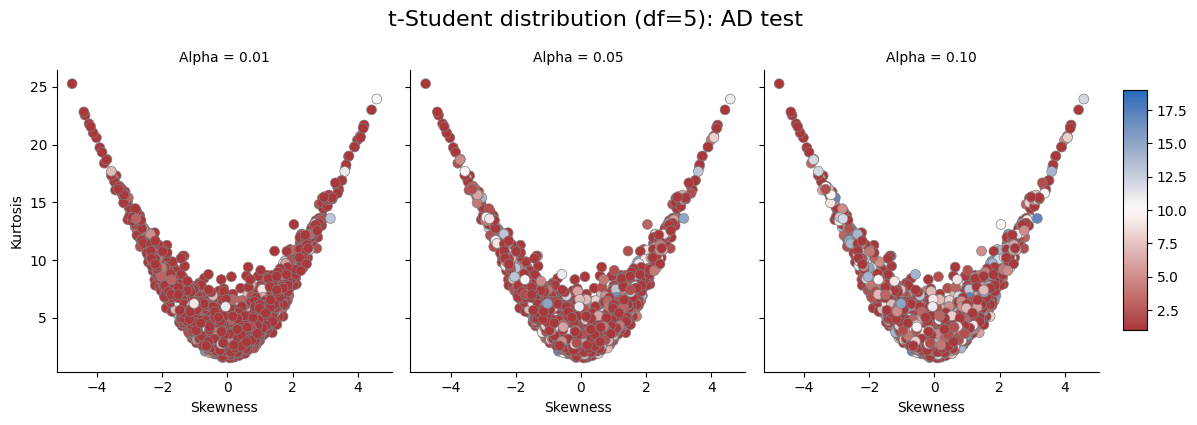

In [24]:
df_ad["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_ad, seeds, data_kurtosis, data_skew, f"t-Student distribution (df={df}): AD test", kind=False)

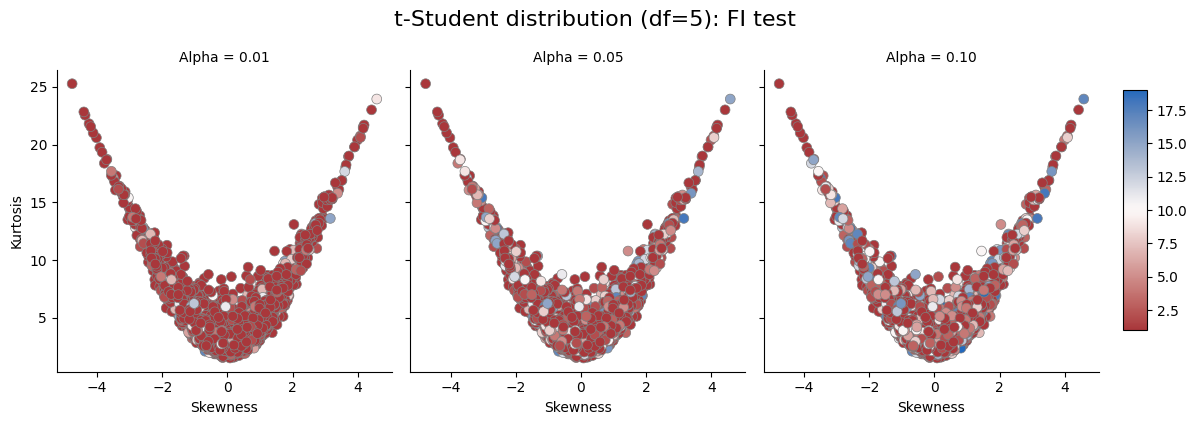

In [25]:
df_filli["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_filli, seeds, data_kurtosis, data_skew, f"t-Student distribution (df={df}): FI test", kind=False)

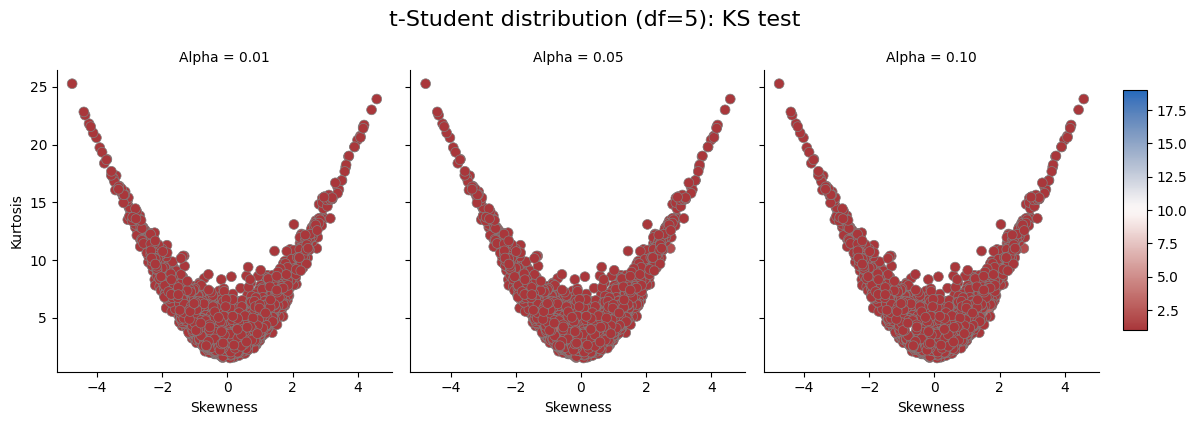

In [26]:
df_ks["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_ks, seeds, data_kurtosis, data_skew, f"t-Student distribution (df={df}): KS test", kind=False)

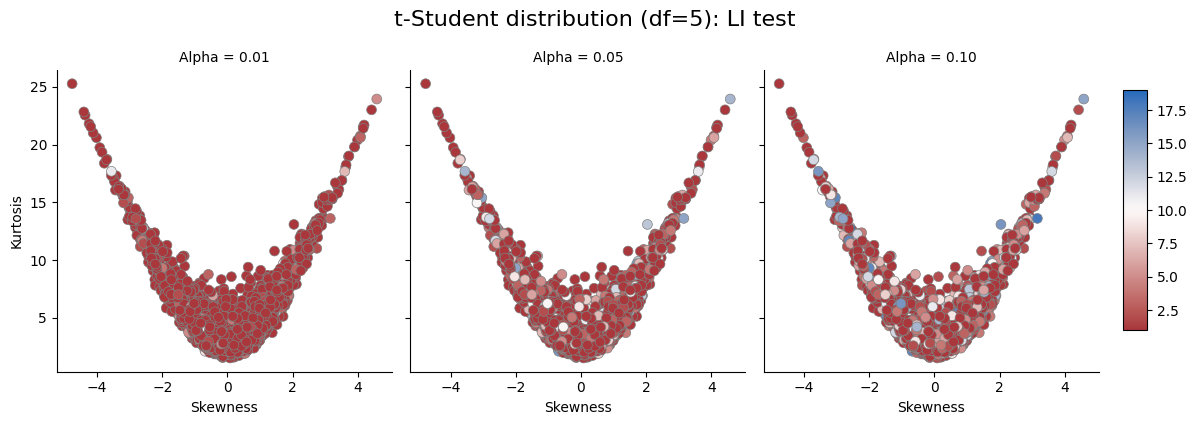

In [27]:
df_li["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_li, seeds, data_kurtosis, data_skew, f"t-Student distribution (df={df}): LI test", kind=False)

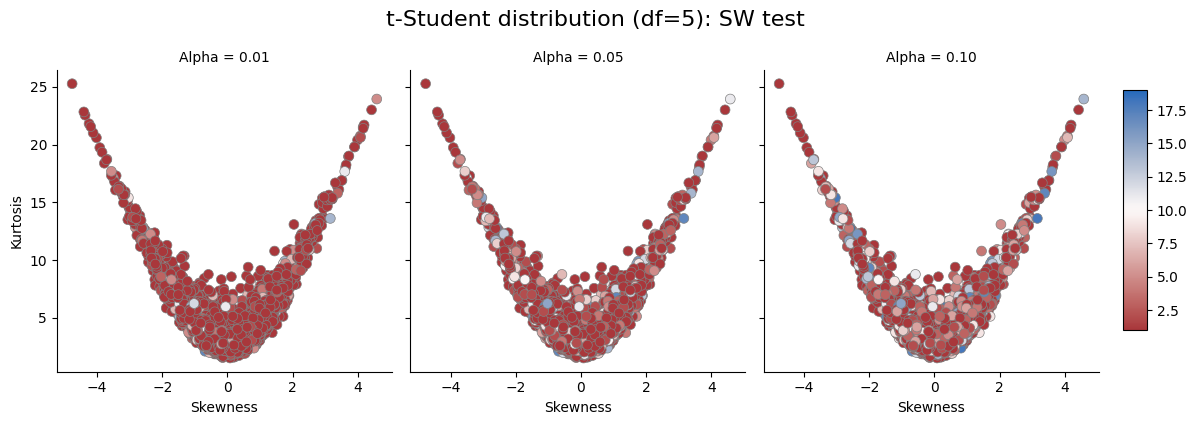

In [28]:
df_shapiro["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_shapiro, seeds, data_kurtosis, data_skew, f"t-Student distribution (df={df}): SW test", kind=False)
    